# Logistic Regression and Confusion Matrix

## Objectives
- To understand  the basic concept of logistic regression
- Implement logistic regression as classifier
- Understand Confusion Matrix

## Theory
- Logistic Regression 
    y=logit=logit(p/(1-p))=beta_0+beta_1*X
- Confusion Matrix
  - Accuracy
  - Precision
  - Recall
  - F1-Score

## Machine Learning - Logistic Regression 

- Logistic regression aims to solve classification problems.
- It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.
- In the simplest case there are two outcomes, which is called binomial, an example of which is predicting if a tumour is malignant or benign.
- Other cases have more than two outcomes to classify, in this case it is called multinomial.
- A common example for multinomial logistic regression would be predicting the class of an iris flower between 3 different species.
- In Python we have modules that will do the work for us.
- Start by importing the NumPy module.
- Store the independent variables in X.
- Store the dependent variable in y.

In [14]:
import numpy as np
#Sample dataset
#X represents the size of a tumour in centimeters.
X = np.array([3.78,2.44,2.09,0.14,1.72,1.65,4.92,4.37,4.96,4.52,3.69,5.88]).reshape(-1,1)
#Converting column form
#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to
#y represents whether or not the tumor is cancerous (0 for "No",1 for "Yes").
y=np.array([0,0,0,0,0,0,1,1,1,1,1,1])
print(X)

[[3.78]
 [2.44]
 [2.09]
 [0.14]
 [1.72]
 [1.65]
 [4.92]
 [4.37]
 [4.96]
 [4.52]
 [3.69]
 [5.88]]


In [15]:
from sklearn import linear_model
regl=linear_model.LogisticRegression()
regl.fit(X,y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [16]:
regl.intercept_ #beta_0

array([-4.83687979])

In [17]:
regl.coef_ #beta_1

array([[1.39514829]])

In [18]:
#logit=-4.83+1.39X
predicted= regl.predict(np.array([3.4]).reshape(-1,1))
print(predicted)

[0]


In [19]:
odds=np.exp(regl.coef_)
print(odds)

[[4.03557295]]


In [20]:
def logit2prob(logr,x):
    log_odds=logr.coef_ *x+ logr.intercept_
    odds=np.exp(log_odds)
    probability=odds/(1+odds)
    return(probability)
print(logit2prob(regl,X))


[[0.60749168]
 [0.19267555]
 [0.12774788]
 [0.00955056]
 [0.08037781]
 [0.0734485 ]
 [0.88362857]
 [0.77901203]
 [0.88924534]
 [0.81293431]
 [0.57718238]
 [0.96664398]]


## Machine Learning - Confusion Matrix 

### Confusion Matrix 

- It is a table that is used in classification problems to process where errors in the model were made.
- The rows represent the actual classes the outcomes should have been. While the columns represent the predictors we have made. Using this table it is easy to see which prediction was wrong. 

### Creating a Confusion Matrix

- Confusion matrixes can be created by predictions made from a logistic regression.
- For now we will generate actual and predicted values by utilizing NumPy.

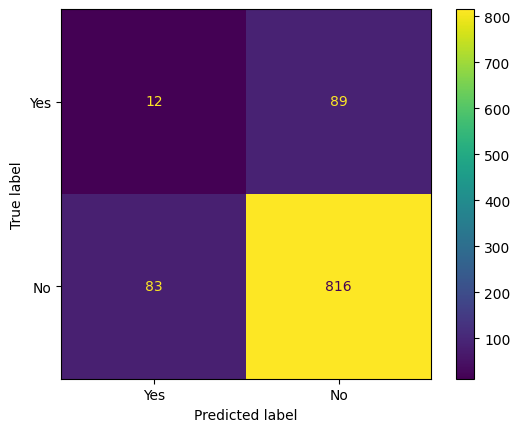

In [24]:
actual= np.random.binomial(1,0.9,size=1000)
predicted=np.random.binomial(1,0.9,size=1000)
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(actual,predicted)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                          display_labels=["Yes","No"])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()


In [25]:
accuracy=metrics.accuracy_score(actual,predicted)
precision=metrics.precision_score(actual,predicted)
recall=metrics.recall_score(actual,predicted)
f1=metrics.f1_score(actual,predicted)

print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1 score :",f1)

Accuracy : 0.828
Precision : 0.901657458563536
Recall : 0.9076751946607341
F1 score : 0.9046563192904656


## Machine Learning - AUC - ROC Curve 

- In classification, there are many different evaluation metrics.
- The most popular is accuracy, which measures how often the model is correct.
- This is a great metric because it is easy to understand and getting the most correct guesses is often desired.
- There are some cases where you might consider using another evaluation metric.
- Another common metric is AUC, area under the receiver operating characteristic (ROC) curve.
- The Receiver operating characteristic curve plots the true positive (TP) rate versus the false positive (FP) rate at different classification thresholds.
- The thresholds are different probability cutoffs that separate the two classes in binary classification.
- It uses probability to tell us how well a model separates the classes.

In [28]:
#AUC-ROC Curve
#AUC = Area under a curve
#ROC= Receiver Operating Characteristics Curve

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
n=10000
ratio=.95
n_0=int((1-ratio)*n)
n_1=int(ratio*n)
y=np.array([0]*n_0+[1]*n_1)
y_proba=np.array([1]*n)
y_pred=y_proba>.5
print(f'accuracy score: {accuracy_score(y,y_pred)}')
cf_mat=confusion_matrix(y,y_pred)
print('Confusion Matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.95
Confusion Matrix
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


In [29]:
y_proba_2=np.array(
    np.random.uniform(0,.7,n_0).tolist()+
    np.random.uniform(.3,1,n_1).tolist()
)
y_pred_2=y_proba_2>.5

print(f'accuracy score: {accuracy_score(y,y_pred_2)}')
cf_mat=confusion_matrix(y,y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.7138
Confusion matrix
[[ 369  131]
 [2731 6769]]
class 0 accuracy: 0.738
class 1 accuracy: 0.7125263157894737


In [31]:
import matplotlib.pyplot as plt
def plot_roc_curve(true_y,y_prob):
    """
    plots the roc curve based of the probabilities
    """
    fpr,tpr,thresholds = roc_curve(true_y,y_prob)
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.5
model 2 AUC score: 0.8455566315789473


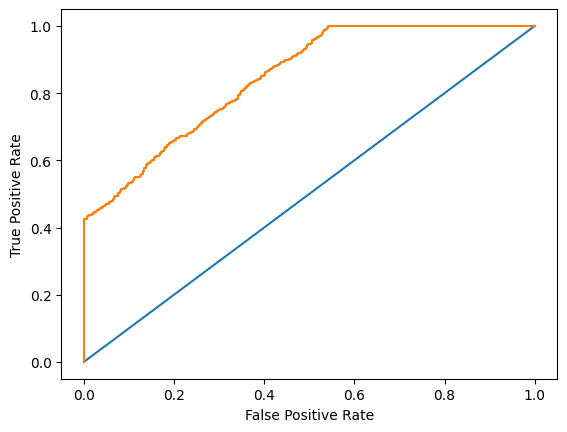

In [32]:
plot_roc_curve(y,y_proba)
print(f'model 1 AUC score: {roc_auc_score(y,y_proba)}')
plot_roc_curve(y,y_proba_2)
print(f'model 2 AUC score: {roc_auc_score(y,y_proba_2)}')